In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/Users/wenyalan/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
for X, y in train_iter:
    break
X.shape

torch.Size([256, 1, 28, 28])

In [4]:
y.shape

torch.Size([256])

In [5]:
input_nums = 28 * 28
hidden_nums = 256
output_nums = 10
W1 = nn.Parameter(
    torch.randn((input_nums, hidden_nums), requires_grad=True) * 0.01)
b1 = nn.Parameter(
    torch.zeros(hidden_nums, requires_grad=True))
W2 = nn.Parameter(
    torch.randn((hidden_nums, output_nums), requires_grad=True)* 0.01)
b2 = nn.Parameter(
    torch.zeros(output_nums, requires_grad=True))

In [6]:
def relu(X):
    X_zero = torch.zeros_like(X)
    return torch.max(X_zero, X)    

In [7]:
W1.shape[0]

784

In [8]:
def net(X):
    H = torch.matmul(X.reshape(-1, W1.shape[0]), W1) + b1
    H = relu(H)
    return torch.matmul(H, W2) + b2

In [9]:
loss = nn.CrossEntropyLoss()

In [10]:
lr = 0.1
params = [W1, b1, W2, b2]
def updater(batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

AssertionError: 0.33773333333333333

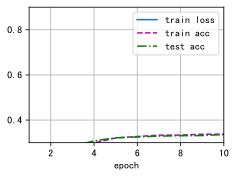

In [11]:
# 使用自己写的SGD方法 
# 准确率会变低，可能是由于考虑了Momentum
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

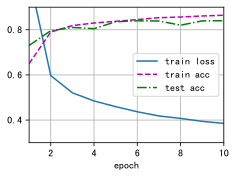

In [10]:
# 使用pytorch内置优化方法
lr = 0.1
params = [W1, b1, W2, b2]
updater = torch.optim.SGD(params, lr=lr)
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

## Pytorch实现模型

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/Users/wenyalan/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
input_nums = 28 * 28
hidden_nums = 256
output_nums = 10

net = nn.Sequential(nn.Flatten(),
                   nn.Linear(input_nums, hidden_nums),
                   nn.ReLU(),
                   nn.Linear(hidden_nums, output_nums))

def weight_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, std=0.01)
        nn.init.constant_(m.bias, val=0)
        
net.apply(weight_init)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [3]:
loss = nn.CrossEntropyLoss()

SGD = torch.optim.SGD(net.parameters(), lr=0.1)

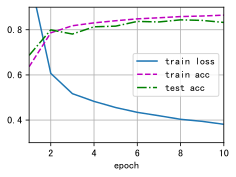

In [5]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, SGD)